### Deep learning models are good at fitting to the given training data. They are not necessarily good at generalizing. So we need to do some manual work to tune hyperparameters in order to get a model that generalizes well! At no point, do we want to use any information derived from test data. We only use test data to evaluate generality of our final model. Validation set is used to evaluate model when tuning hyperparameters. Before testing on test data, we would ideally want to train the model from scratch on whole training+validation dataset, once we are done tuning the hyperparameters

In [1]:
from keras.datasets import imdb
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplitlib.pyplot as plt
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)

def vectorize_sequences(sequences, dimension=20000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

train_X = vectorize_sequences(train_data)
test_X = vectorize_sequences(test_data)
train_Y = np.asarray(train_labels).astype('float32')
test_Y = np.asarray(test_labels).astype('float32')

In [6]:
original_model = Sequential()
original_model.add(Dense(16, activation='relu', input_shape=(20000,)))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))
original_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])

In [7]:
smaller_model = Sequential()
smaller_model.add(Dense(4, activation='relu', input_shape=(20000,)))
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])

In [8]:
larger_model = Sequential()
larger_model.add(Dense(512, activation='relu', input_shape=(20000,)))
larger_model.add(Dense(512, activation='relu'))
larger_model.add(Dense(1, activation='sigmoid'))
larger_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])

In [10]:
original_history = original_model.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 515us/step - loss: 0.4058 - acc: 0.8298 - val_loss: 0.3074 - val_acc: 0.8860
Epoch 2/20
25000/25000 [==============================] - 11s 435us/step - loss: 0.2001 - acc: 0.9363 - val_loss: 0.2816 - val_acc: 0.8897
Epoch 3/20
25000/25000 [==============================] - 8s 318us/step - loss: 0.1421 - acc: 0.9567 - val_loss: 0.2868 - val_acc: 0.8871
Epoch 4/20
25000/25000 [==============================] - 8s 306us/step - loss: 0.1081 - acc: 0.9682 - val_loss: 0.2957 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.0840 - acc: 0.9779 - val_loss: 0.3163 - val_acc: 0.8805
Epoch 6/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.0663 - acc: 0.9839 - val_loss: 0.3293 - val_acc: 0.8801
Epoch 7/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.0529 - acc: 0.9888 - val_loss: 0.3513 

In [11]:
smaller_history = smaller_model.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 229us/step - loss: 0.5716 - acc: 0.7493 - val_loss: 0.5179 - val_acc: 0.8435
Epoch 2/20
25000/25000 [==============================] - 6s 223us/step - loss: 0.4607 - acc: 0.8734 - val_loss: 0.4785 - val_acc: 0.8605
Epoch 3/20
25000/25000 [==============================] - 6s 224us/step - loss: 0.4171 - acc: 0.9083 - val_loss: 0.4596 - val_acc: 0.8685
Epoch 4/20
25000/25000 [==============================] - 6s 224us/step - loss: 0.3890 - acc: 0.9267 - val_loss: 0.4496 - val_acc: 0.8668
Epoch 5/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.3682 - acc: 0.9372 - val_loss: 0.4411 - val_acc: 0.8716
Epoch 6/20
25000/25000 [==============================] - 5s 213us/step - loss: 0.3513 - acc: 0.9469 - val_loss: 0.4372 - val_acc: 0.8701
Epoch 7/20
25000/25000 [==============================] - 5s 219us/step - loss: 0.3375 - acc: 0.9534 - val_loss: 0.4324 - 

In [12]:
larger_history = larger_model.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 12s 491us/step - loss: 0.7762 - acc: 0.8124 - val_loss: 0.3094 - val_acc: 0.8722
Epoch 2/20
25000/25000 [==============================] - 12s 468us/step - loss: 0.1418 - acc: 0.9482 - val_loss: 0.3657 - val_acc: 0.8606
Epoch 3/20
25000/25000 [==============================] - 12s 465us/step - loss: 0.0563 - acc: 0.9818 - val_loss: 0.4066 - val_acc: 0.8686
Epoch 4/20
25000/25000 [==============================] - 12s 473us/step - loss: 0.0183 - acc: 0.9957 - val_loss: 0.4799 - val_acc: 0.8734
Epoch 5/20
25000/25000 [==============================] - 12s 460us/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.5626 - val_acc: 0.8715
Epoch 6/20
25000/25000 [==============================] - 12s 472us/step - loss: 0.0017 - acc: 0.9998 - val_loss: 0.6244 - val_acc: 0.8704
Epoch 7/20
25000/25000 [==============================] - 11s 458us/step - loss: 7.4663e-04 - acc: 1.0000 - val_loss

In [13]:
epochs = range(1, 21)
original_val_loss = original_history.history['val_loss']
smaller_val_loss = smaller_history.history['val_loss']
larger_val_loss = larger_history.history['val_loss']

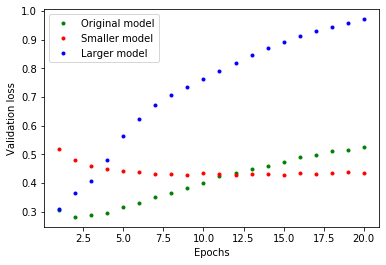

In [18]:
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, smaller_val_loss, 'r.', label='Smaller model')
plt.plot(epochs, larger_val_loss, 'b.', label='Larger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

### What do we see?
#### As we increase the size of network, quicker we are to fit the generalization of model and later quicker to overfit the data on training model too! Larger model is already overfitting the data, while smaller the model is still trying to fit the generalization of data!

### Now let's try with weight regularization and droputs to avoid overfitting!

In [20]:
l2_model = Sequential()
l2_model.add(Dense(16, activation='relu',
                   kernel_regularizer=regularizers.l2(0.001), input_shape=(20000,)))
l2_model.add(Dense(16, activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])
l2_model_history = l2_model.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 336us/step - loss: 0.4690 - acc: 0.8264 - val_loss: 0.3831 - val_acc: 0.8736
Epoch 2/20
25000/25000 [==============================] - 8s 313us/step - loss: 0.2953 - acc: 0.9205 - val_loss: 0.3463 - val_acc: 0.8884
Epoch 3/20
25000/25000 [==============================] - 8s 312us/step - loss: 0.2551 - acc: 0.9379 - val_loss: 0.3386 - val_acc: 0.8894
Epoch 4/20
25000/25000 [==============================] - 8s 322us/step - loss: 0.2325 - acc: 0.9463 - val_loss: 0.3404 - val_acc: 0.8881
Epoch 5/20
25000/25000 [==============================] - 8s 308us/step - loss: 0.2188 - acc: 0.9518 - val_loss: 0.3521 - val_acc: 0.8820
Epoch 6/20
25000/25000 [==============================] - 8s 303us/step - loss: 0.2075 - acc: 0.9561 - val_loss: 0.3490 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 8s 304us/step - loss: 0.1986 - acc: 0.9604 - val_loss: 0.3579 - 

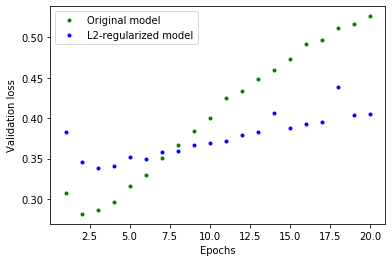

In [21]:
l2_val_loss = l2_model_history.history['val_loss']
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, l2_val_loss, 'b.', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

#### L2-regularized model is slower to overfit on the training data

In [23]:
from keras.layers import Dense, Dropout
dropout_model = Sequential()
dropout_model.add(Dense(16, activation='relu', input_shape=(20000,)))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(16, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(1, activation='sigmoid'))
dropout_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])
dropout_model_history = dropout_model.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))           

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.5250 - acc: 0.7435 - val_loss: 0.3549 - val_acc: 0.8819
Epoch 2/20
25000/25000 [==============================] - 7s 292us/step - loss: 0.3743 - acc: 0.8510 - val_loss: 0.3089 - val_acc: 0.8801
Epoch 3/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.3051 - acc: 0.8848 - val_loss: 0.2795 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 9s 366us/step - loss: 0.2696 - acc: 0.9054 - val_loss: 0.2752 - val_acc: 0.8891
Epoch 5/20
25000/25000 [==============================] - 8s 337us/step - loss: 0.2421 - acc: 0.9176 - val_loss: 0.2742 - val_acc: 0.8886
Epoch 6/20
25000/25000 [==============================] - 8s 316us/step - loss: 0.2147 - acc: 0.9268 - val_loss: 0.2827 - val_acc: 0.8883
Epoch 7/20
25000/25000 [==============================] - 9s 347us/step - loss: 0.1996 - acc: 0.9340 - val_loss: 0.2886 - 

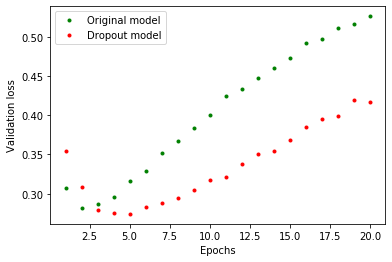

In [24]:
dropout_val_loss = dropout_model_history.history['val_loss']
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r.', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

#### Dropout model is slower to overfit on the training data too!

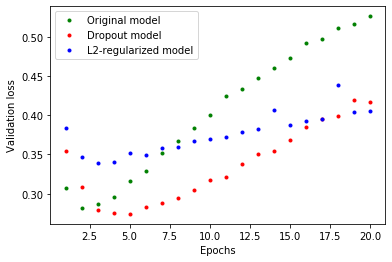

In [25]:
dropout_val_loss = dropout_model_history.history['val_loss']
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r.', label='Dropout model')
plt.plot(epochs, l2_val_loss, 'b.', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

#### For this ML problem, dropout model is better performing than the original one and the L2-regularized model! What we increase penalty we use in L2-regularization model ?

In [26]:
l2_model_v2 = Sequential()
l2_model_v2.add(Dense(16, activation='relu',
                   kernel_regularizer=regularizers.l2(0.01), input_shape=(20000,)))
l2_model_v2.add(Dense(16, activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
l2_model_v2.add(Dense(1, activation='sigmoid'))
l2_model_v2.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])
l2_model_v2_history = l2_model_v2.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 333us/step - loss: 0.6589 - acc: 0.8062 - val_loss: 0.5255 - val_acc: 0.8798
Epoch 2/20
25000/25000 [==============================] - 8s 322us/step - loss: 0.4801 - acc: 0.8904 - val_loss: 0.4761 - val_acc: 0.8814
Epoch 3/20
25000/25000 [==============================] - 8s 326us/step - loss: 0.4326 - acc: 0.9011 - val_loss: 0.4520 - val_acc: 0.8830
Epoch 4/20
25000/25000 [==============================] - 8s 320us/step - loss: 0.4096 - acc: 0.9034 - val_loss: 0.4371 - val_acc: 0.8850
Epoch 5/20
25000/25000 [==============================] - 8s 323us/step - loss: 0.3908 - acc: 0.9096 - val_loss: 0.4321 - val_acc: 0.8814
Epoch 6/20
25000/25000 [==============================] - 8s 327us/step - loss: 0.3774 - acc: 0.9128 - val_loss: 0.4231 - val_acc: 0.8834
Epoch 7/20
25000/25000 [==============================] - 9s 357us/step - loss: 0.3677 - acc: 0.9160 - val_loss: 0.4177 - 

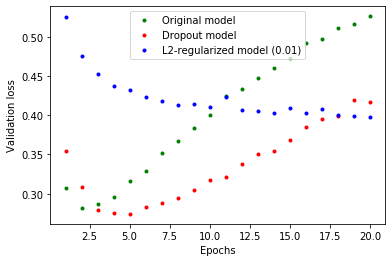

In [27]:
l2_model_v2_val_loss = l2_model_v2_history.history['val_loss']
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r.', label='Dropout model')
plt.plot(epochs, l2_model_v2_val_loss, 'b.', label='L2-regularized model (0.01)')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [30]:
l2_model_v3 = Sequential()
l2_model_v3.add(Dense(16, activation='relu',
                   kernel_regularizer=regularizers.l2(0.005), input_shape=(20000,)))
l2_model_v3.add(Dense(16, activation='relu',
                  kernel_regularizer=regularizers.l2(0.005)))
l2_model_v3.add(Dense(1, activation='sigmoid'))
l2_model_v3.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])
l2_model_v3_history = l2_model_v3.fit(train_X, train_Y, epochs=20, batch_size=512, validation_data=(test_X, test_Y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 366us/step - loss: 0.5903 - acc: 0.8097 - val_loss: 0.4846 - val_acc: 0.8768
Epoch 2/20
25000/25000 [==============================] - 9s 343us/step - loss: 0.4423 - acc: 0.8854 - val_loss: 0.4376 - val_acc: 0.8826
Epoch 3/20
25000/25000 [==============================] - 9s 340us/step - loss: 0.3982 - acc: 0.9011 - val_loss: 0.4187 - val_acc: 0.8833
Epoch 4/20
25000/25000 [==============================] - 8s 321us/step - loss: 0.3769 - acc: 0.9058 - val_loss: 0.4114 - val_acc: 0.8820
Epoch 5/20
25000/25000 [==============================] - 8s 321us/step - loss: 0.3616 - acc: 0.9129 - val_loss: 0.4176 - val_acc: 0.8740
Epoch 6/20
25000/25000 [==============================] - 8s 324us/step - loss: 0.3496 - acc: 0.9157 - val_loss: 0.4006 - val_acc: 0.8834
Epoch 7/20
25000/25000 [==============================] - 8s 328us/step - loss: 0.3395 - acc: 0.9191 - val_loss: 0.3948 - 

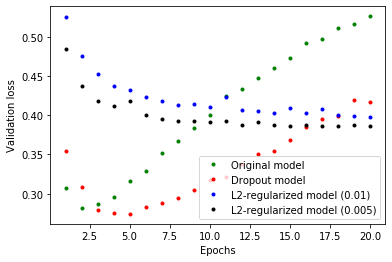

In [31]:
l2_model_v3_val_loss = l2_model_v3_history.history['val_loss']
plt.plot(epochs, original_val_loss, 'g.', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r.', label='Dropout model')
plt.plot(epochs, l2_model_v2_val_loss, 'b.', label='L2-regularized model (0.01)')
plt.plot(epochs, l2_model_v3_val_loss, 'k.', label='L2-regularized model (0.005)')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

#### Increase penalty to 0.005 a bit we see better regularization than we saw using 0.001! To explain how regularization works? We do not allow environment where some parameters of model increase disproportionately than other parameters. We do this either via dropping some weight parameters randomly during training ( only ) or via penalizing the weight parameters.